## 1. Import Libraries & Load Data

In [5]:
# 1. Import Libraries
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Add custom scripts to Python path
sys.path.append(os.path.abspath('../src'))  # Adjust if your structure differs

# 3. Import custom modules
from data_loader import load_creditcard_data
from preprocessing import clean_creditcard_data

# 4. Load and clean credit card dataset
CLEANED_DATA_PATH = '../data/processed/creditcard_cleaned.csv'
RAW_DATA_PATH = '../data/raw/creditcard.csv'

# If cleaned file exists, load it directly; otherwise, load + clean raw
if os.path.exists(CLEANED_DATA_PATH):
    credit_df = load_creditcard_data(CLEANED_DATA_PATH)
else:
    raw_df = load_creditcard_data(RAW_DATA_PATH)
    credit_df = clean_creditcard_data(raw_df)
    credit_df.to_csv(CLEANED_DATA_PATH, index=False)

Loaded Credit Card Data: (283726, 31) rows, columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


## 2. Understand Dataset Structure
* Check number of rows, columns, datatypes, missing values.

* Note that Time, Amount, Class are important columns.

* V1 to V28 are anonymized PCA features.

In [6]:
credit_df.info()
credit_df.head()
credit_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283726 entries, 0 to 283725
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


## 3. Target Variable Distribution (Class Imbalance)
*  visualize and quantify imbalance in target variable

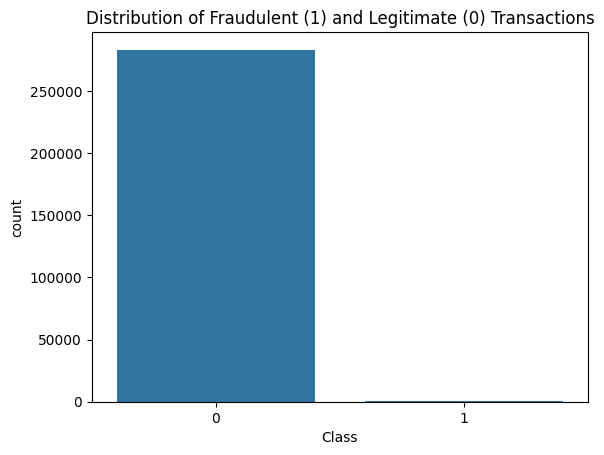

Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


In [8]:
sns.countplot(x='Class', data=credit_df)
plt.title('Distribution of Fraudulent (1) and Legitimate (0) Transactions')
plt.savefig('../figures/creditcard_class_distribution.png')
plt.show()

print(credit_df['Class'].value_counts(normalize=True))

## 4. Transaction Amount Analysis
* Check distribution of transaction amounts, which may help distinguish fraud.

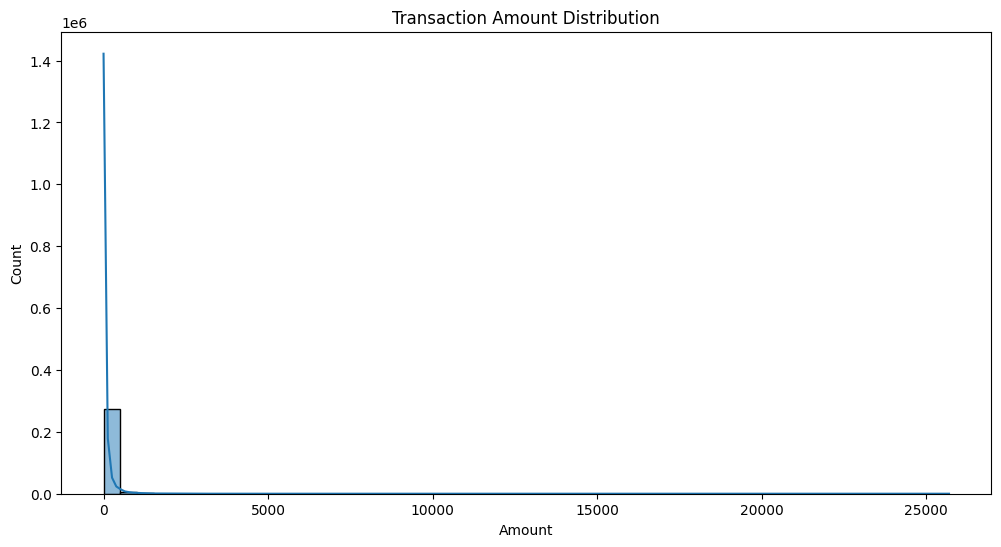

In [9]:
plt.figure(figsize=(12,6))
sns.histplot(data=credit_df, x='Amount', bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.savefig('../figures/transaction_amount_distribution.png')
plt.show()


## 5. Transaction Time Analysis
* Time is seconds elapsed since first transaction — understand any time patterns.

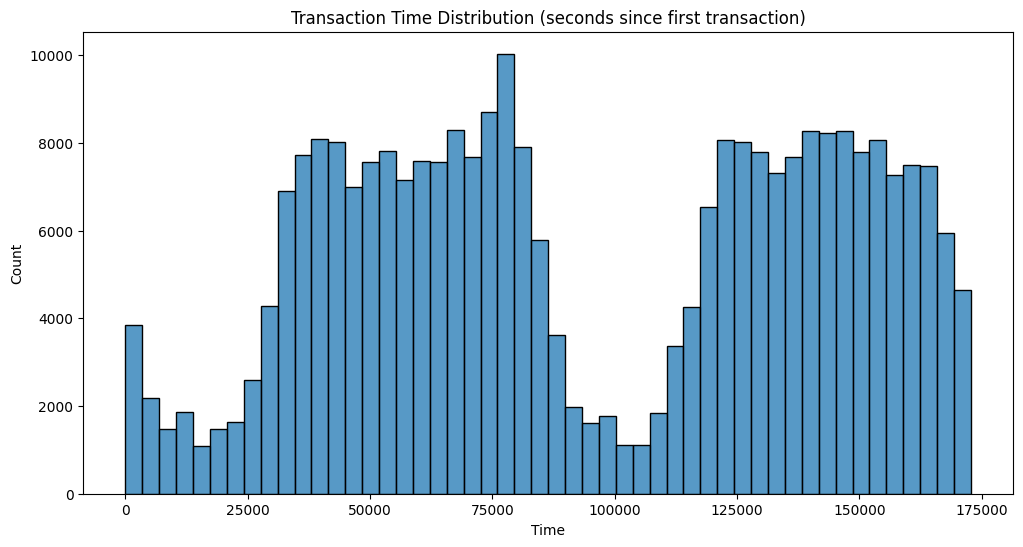

In [10]:
plt.figure(figsize=(12,6))
sns.histplot(credit_df['Time'], bins=50)
plt.title('Transaction Time Distribution (seconds since first transaction)')
plt.savefig('../figures/transaction_time_distribution.png')
plt.show()

## 6. Correlation Matrix
* Helps identify feature relationships, although PCA features may not be intuitive.

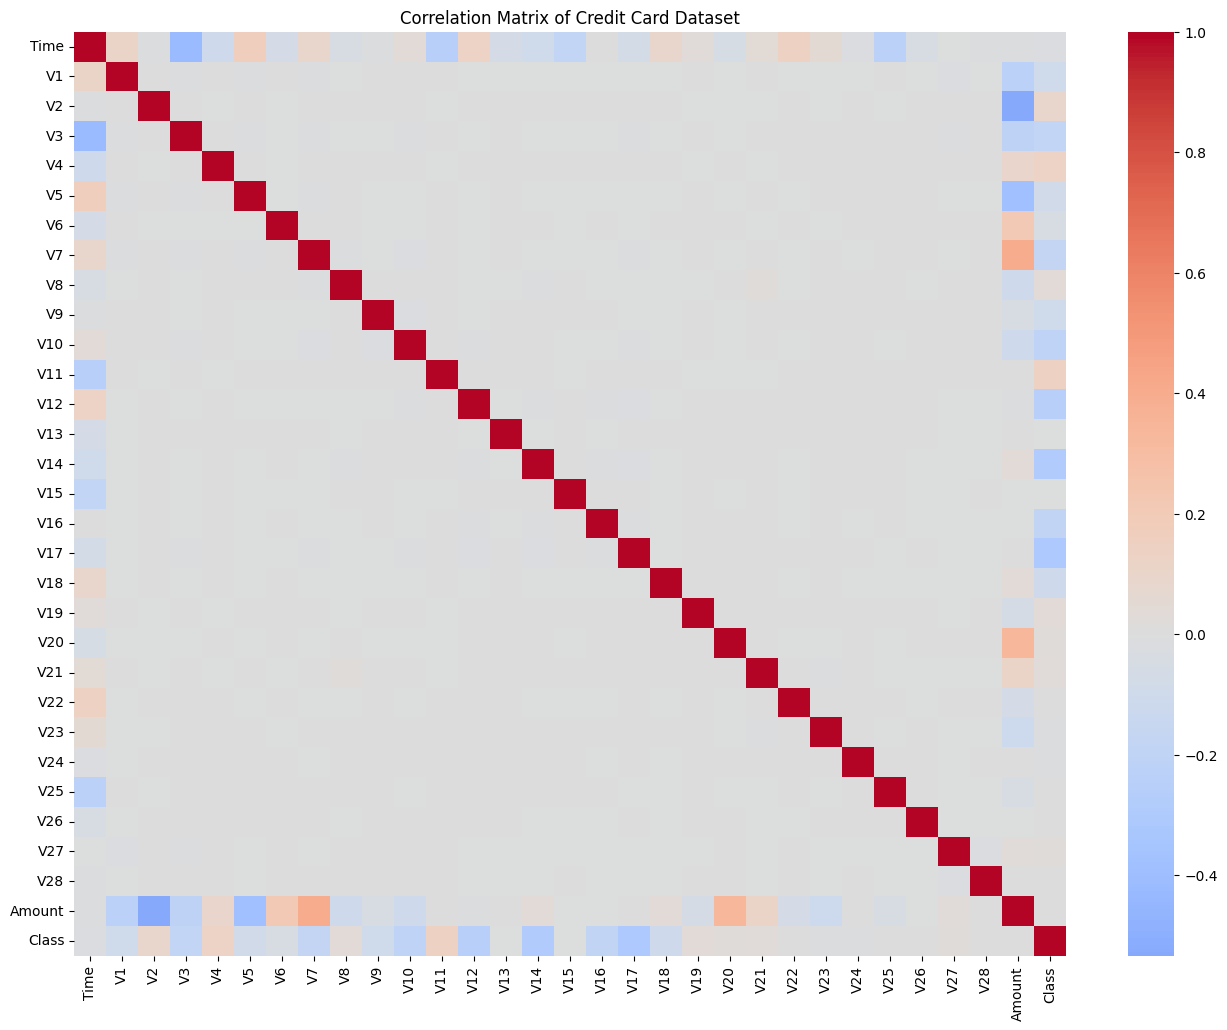

In [11]:
plt.figure(figsize=(16,12))
corr = credit_df.corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Credit Card Dataset')
plt.savefig('../figures/creditcard_correlation_matrix.png')
plt.show()


## 7. Fraudulent vs Legitimate Transaction Amounts
* Compare amounts between fraud and non-fraud classes.

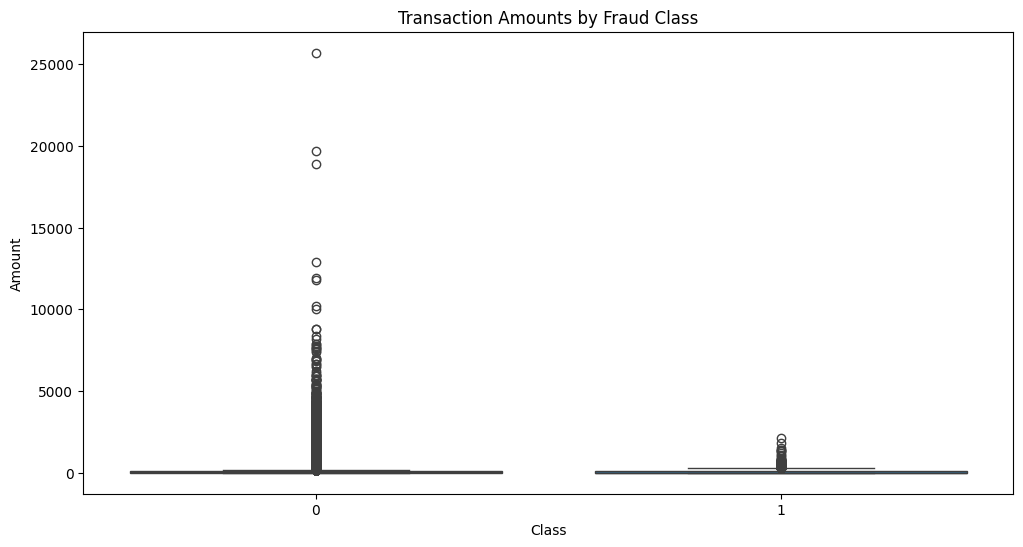

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Class', y='Amount', data=credit_df)
plt.title('Transaction Amounts by Fraud Class')
plt.savefig('../figures/amount_by_class.png')
plt.show()

## 8.PCA Features Distribution
* Visualize distribution of anonymized features.

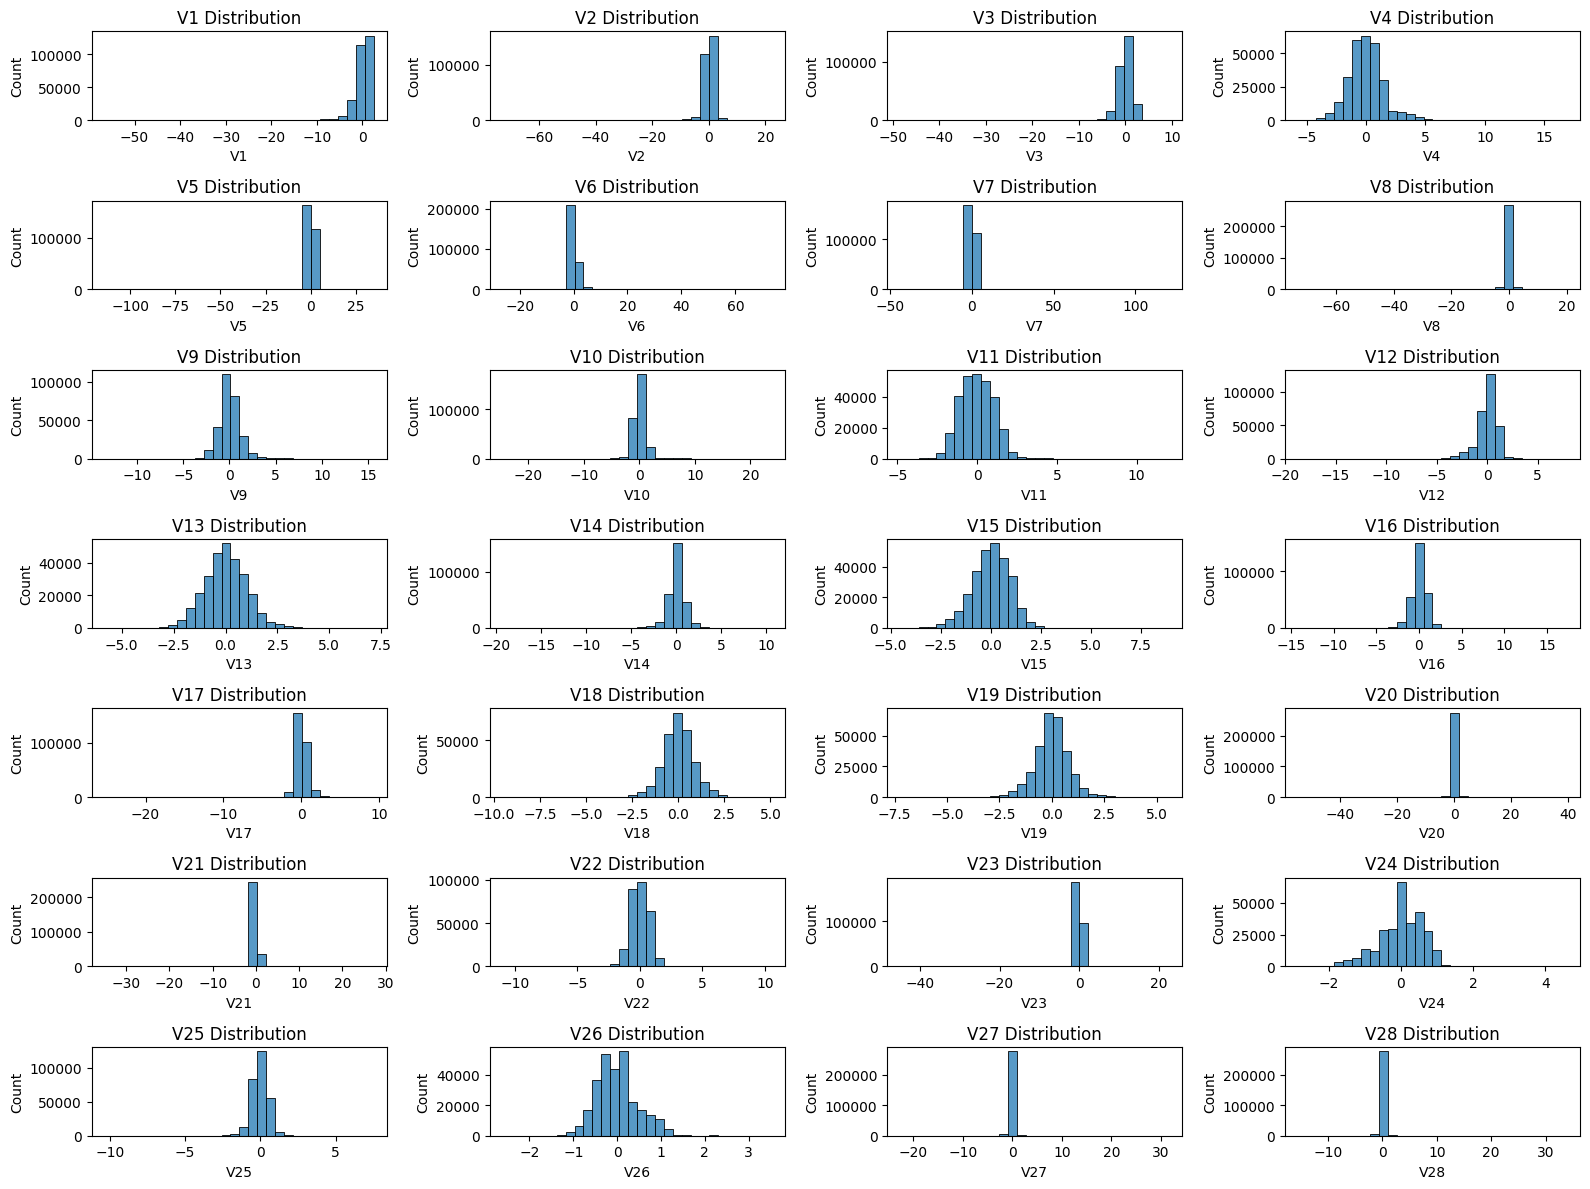

In [13]:
plt.figure(figsize=(16,12))
for i in range(1, 29):
    plt.subplot(7, 4, i)
    sns.histplot(credit_df[f'V{i}'], bins=30)
    plt.title(f'V{i} Distribution')
plt.tight_layout()
plt.savefig('../figures/pca_features_distribution.png')
plt.show()